## House Price Prediction Project
The objective of this project is to predict house prices based on various features using different machine learning models and evaluate their accuracy. We will compare the performance of models such as Linear Regression, Random Forest.


### Data Loading and Exploration

In [1]:
import pandas as pd
train_df = pd.read_csv('train.csv')
# Checking the data
train_df.head()
train_df.describe()
train_df.isnull().sum().sort_values(ascending=False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

## Data Preprocessing
In this section, we handle missing values and encode categorical features to make the dataset suitable for machine learning models. 
Numerical columns are imputed using the median, and categorical columns are encoded using one-hot encoding.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
# Separate the target variable (SalePrice) from the features
X = train_df.drop(columns=['SalePrice'])  # Dropping target variable
y = train_df['SalePrice']  # Target variable

# Identifying the categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create pipelines for numerical and categorical data
# Imputing missing numerical values with the median and scaling the data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Imputing missing categorical values with the most frequent value and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining both transformers into a single preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Splitting the dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


###  Model Development


#### Linear Regression Model
We start with a simple linear regression model to establish a baseline. Linear regression assumes a linear relationship between features and the target variable (house prices). We will evaluate its performance using R² and RMSE.


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating the pipeline for Linear Regression
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('model', LinearRegression())  # Linear Regression model
])

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_linear = linear_model.predict(X_val)

# Evaluate the model performance
linear_r2 = r2_score(y_val, y_pred_linear)
linear_rmse = mean_squared_error(y_val, y_pred_linear, squared=False)

# Print out the results
print(f'Linear Regression R²: {linear_r2}')
print(f'Linear Regression RMSE: {linear_rmse}')


Linear Regression R²: 0.8867266045127138
Linear Regression RMSE: 29476.158060086516


#### Random Forest Model
Next, we use a Random Forest model, which is capable of capturing non-linear relationships between features. It also handles feature importance, so we expect better performance compared to linear regression.


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Creating the pipeline for Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))  # Random Forest model
])

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate the Random Forest model
rf_r2 = r2_score(y_val, y_pred_rf)
rf_rmse = mean_squared_error(y_val, y_pred_rf, squared=False)

# Print out the results
print(f'Random Forest R²: {rf_r2}')
print(f'Random Forest RMSE: {rf_rmse}')


Random Forest R²: 0.8939002860298636
Random Forest RMSE: 28527.52033809099


#### Model Comparison Using Visualizations

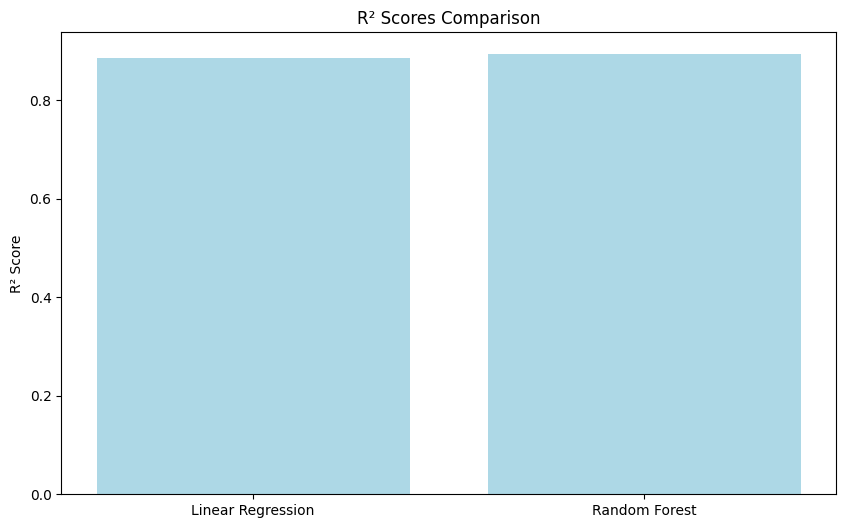

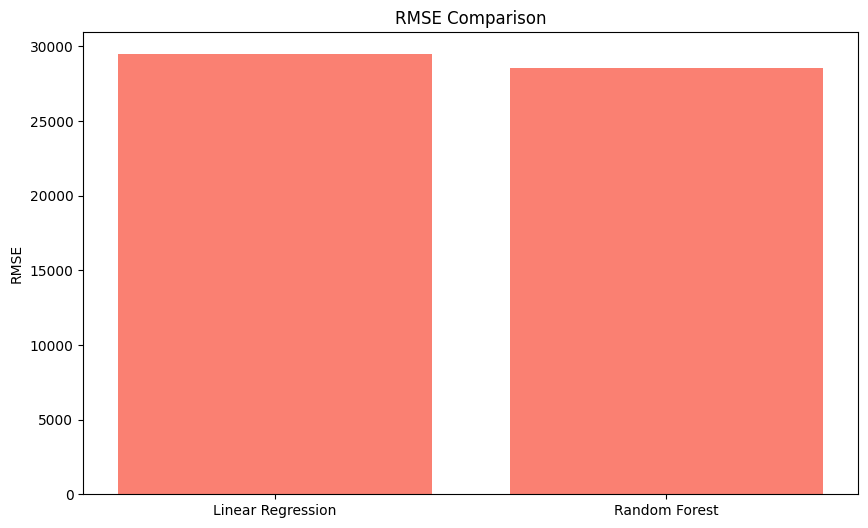

In [13]:
import matplotlib.pyplot as plt

# Store model names and performance metrics for comparison
models = ['Linear Regression', 'Random Forest']
r2_scores = [linear_r2, rf_r2]
rmse_scores = [linear_rmse, rf_rmse]

# Plotting the R² scores for comparison
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color='lightblue')
plt.title('R² Scores Comparison')
plt.ylabel('R² Score')
plt.show()

# Plotting the RMSE scores for comparison
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color='salmon')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.show()


We can see the plotted the R² scores to check how well each model captures the variance in house prices. The closer to 1, the better.
The comparison of RMSE scores (lower values indicate better performance) also helps.

We can see here random forest performs better in both cases.

## Conclusion
After comparing the performance of Linear Regression and Random Forest, we find that Random Forest performs slightly better in terms of both R² and RMSE. This suggests that the data has non-linear relationships, which Random Forest can capture effectively.
